Using TensorFlow backend.


Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


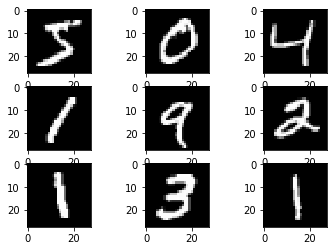

In [1]:
#EXAMPLE
# classification of images of 0s to 9s which are 10 classes

import tensorflow as tf                    # imports tensorflow
from tensorflow import keras               # imports keras
from keras.datasets import mnist           # import loading mnist dataset
from matplotlib import pyplot              # importing pyplot
from sklearn.model_selection import KFold  # import KFold
from numpy import mean
from numpy import std
from keras.datasets import mnist
from keras.utils import to_categorical 
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

# loading dataset
(trainX,trainy),(testX, testy) = mnist.load_data()

#prints loaded datasets of Train and Test
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' %(testX.shape,testy.shape))

# plots the first 9 images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1+ i)
    # plot raw pixel data
    pyplot.imshow(trainX[i],cmap=pyplot.get_cmap('gray'))
#shows the figure
pyplot.show()

In [2]:
# LOAD DATA
# loading images & reshape the data arrays to have single color channel. 
# we know the images are already pre-aligned as in they contains hand drawn digits, same square size & grayscales
# we also know there are 10 classes 0 to 9 unique digits

def load_dataset():
    #loads data
    (trainX,trainY),(testX,testY) = mnist.load_data()
    
    #reshapes to a single color channel
    trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
    testX = testX.reshape((testX.shape[0], 28, 28, 1))

    #one hot encode target
    # Transforms integer into a 10 element binary vector
    # with 1 for index of the class and 0 values for all other classes.
    trainY = to_categorical(trainY)               # or tf.keras.utils.to_categorical if haven't imported
    testY = to_categorical(testY)
        #print(trainY)
        #print(testY)
    return trainX,trainY,testX,testY

In [3]:
# PREPARE PIXEL DATA 
# the images in this dataset are unsigned integers range  between black(0) and white(255).
#normalize the pixel values of grayscale images --> rescale to range [0,1].
# converting data type (unsig int)--> (floats).
# then, divide the pixel values by the maximum value.
# MUST CALL FUNCTION PRIOR TO MODELING

def prep_pixels(train,test):
    # int to float
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')

    #normalize
    train_norm = train_norm/ 255.0
    test_norm = test_norm/ 255.0
    
    return train_norm, test_norm

In [4]:
#DEFINE MODEL
# convolutional layer 3x3, filter 32 each time
# maximum pooling layer 2x2
# filter maps flatten which provides features to the classifier.
# 10 classes 10 nodes  --> add dense layer 100 nodes
# all layers use ReLU function
# stochastic descent optimizer learning rate 0.01 & momentum of 0.9
# categorical cross-entropy loss function

def define_model():
    model = Sequential()
    model.add(Conv2D(32,(3,3),activation = 'relu', kernel_initializer = 'he_uniform', input_shape = (28,28,1)))
    model.add(MaxPooling2D((2,2)))
    model.add(Flatten())
    model.add(Dense(100,activation ='relu', kernel_initializer = 'he_uniform'))
    model.add(Dense(10,activation = 'softmax'))
    opti = SGD(lr = 0.01, momentum = 0.9)
    model.compile(optimizer = opti, loss = 'categorical_crossentropy', metrics = ['accuracy'] )
    return model
    

In [5]:
#EVALUATION
def eval_model(dataX,dataY, n_folds = 5):
    scores,histories = list(), list()
    #cross val prep
    kfold = KFold(n_folds,shuffle = True, random_state = 1)
    #enumerate splits
    print(len(dataX))
    print(dataX[0][0][0])
    
    for train_ix, test_ix in kfold.split(dataX):
        #model defined
        model = define_model()
        #selection of rows for train and test
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        # fit model
        history = model.fit(trainX,trainY, epochs = 10, batch_size = 32, validation_data = (testX,testY), verbose = 0)
        #eval model
        _, acc = model.evaluate(testX, testY, verbose = 0)
        print('> %.3f'% (acc * 100.0))
        # stores scores
        scores.append(acc)
        histories.append(history)
    return scores,histories

In [6]:
#DIAGNOSTICS
def summarize_diagnostics(histories):
    for i in range(len(histories)):
        # plot loss
        pyplot.subplot(2, 1, 1)
        pyplot.title('Cross Entropy Loss')
        pyplot.plot(histories[i].history['loss'], color='blue', label='train')
        pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
        # plot accuracy
        pyplot.subplot(2, 1, 2)
        pyplot.title('Classification Accuracy')
        pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
        pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
    pyplot.show()

In [7]:
#SUMMARIZE MODEL 
# summarize model performance
def summarize_performance(scores):
    # print summary
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
    # box and whisker plots of results
    pyplot.boxplot(scores)
    pyplot.show()

60000
[0.]
> 98.625
> 98.600
> 98.658
> 98.900
> 98.742
[0.9862499833106995, 0.9860000014305115, 0.9865833520889282, 0.9890000224113464, 0.987416684627533] [<keras.callbacks.callbacks.History object at 0x000001E0932FBF08>, <keras.callbacks.callbacks.History object at 0x000001E092F6BE88>, <keras.callbacks.callbacks.History object at 0x000001E0961D23C8>, <keras.callbacks.callbacks.History object at 0x000001E0990359C8>, <keras.callbacks.callbacks.History object at 0x000001E09645FE48>]


C:\Users\Ladelle\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
C:\Users\Ladelle\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Ladelle\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecati

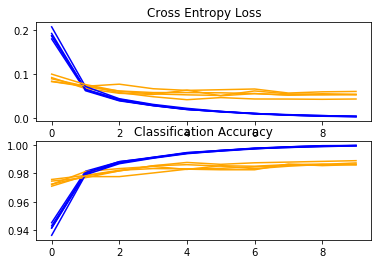

Accuracy: mean=98.705 std=0.109, n=5


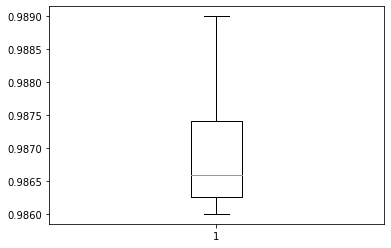

In [8]:
# RUN THE TESTS
# run the test harness for evaluating a model
def run_test_harness():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # evaluate model
    scores, histories = eval_model(trainX, trainY)
    #checking
    print(scores,histories)
    # learning curves
    summarize_diagnostics(histories)
    # summarize estimated performance
    summarize_performance(scores)
run_test_harness()